# **Example**

## First, we load the necessary libraries.

In [1]:
import os
import fnmatch

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno as msno

# Import Chorus scripts
import chorus_get_data as gdata
import chorus_qc_data as qdata
import chorus_harmonize_data as hdata
import chorus_data_cube as dcube
import chorus_utils as chutils
import chorus_ebv_ready_dataset as chebv

The chorus_get_data script contains functions for retrieving data from various sources, including:

- Inference
- Dataloggers
- Weather stations
- Metadata files

The chorus_qc_data script contains functions for performing basic quality analysis of the information, such as:
- Detection of null values.
- Detection of duplicate values.
- Detection of outliers.

The chorus_harmonize_data script contains functions to harmonize the data from inferences and climate variables using the temporal variable with a resolution of 15 minutes.

The chorus_ebv_ready_dataset script contains functions to create and read EBV-ready datasets in the Apache Parquet format.

## Second, we define the following parameters:

- location
- date range
- path to the folder containing the data (inferences, climatic variables, etc.)
- nane of the file that contains the metadata of the locations
- name of the file that contains the metadata for the EBV-ready dataset that is going to be created
- name of the NetCDF file that will contain the EBV-ready dataset. Be sure to include the .nc extension in the file name

In this example, the "sample_data" folder, which contains the data, is located in the same folder as the Chorus scripts.

In [2]:
# Enter location id
location_id = 'INCT17'
# Enter dates as string in YYYY-MM-DD format
start_date = "2019-09-13"
end_date = "2021-04-24"
# Enter the path to the folder containing the files
folder_path = "sample_data"
# Enter the nane of the file that contains the metadata of the locations
locations_metadata_file = "locations_metadata.xlsx"
# Enter the name of the file that contains the metadata for the EBV-ready dataset that is going to be created
ebvs_metadata_file = "ebvs_metadata.xlsx"
# Enter the name of the Apache Parquet file that will contain the EBV-ready dataset. Be sure to include the .gzip extension in the file name.
ebv_rd_name = "INCT17_ebvready_20190913_20210424.gzip"

ebv_rd_metadata = "baseline_performance.csv"

## Third, load Primary Observations

### 1. Inference data

The function get_inference() in the chorus_get_data script reads inference files in Apache Parquet format.
 
    Args:
        folder_path (str): path to the folder containing the inference files.
        location_id (str): location identifier.
        date_ini (str): start date in YYYY-MM-DD format.
        date_fintr): end date in YYYY-MM-DD format.
        raw (boolean): flag that indicates if you want to obtain the raw data.
        
    Returns:
       df_sel (pandas DataFrame): DataFrame that contains the inferences on the requested dates.
       df_raw (pandas DataFrame): DataFrame that contains the raw inferences (if requested).

In [3]:
# get_inference() imports inference raw data
df_inf1 = gdata.get_inference(folder_path, location_id, start_date, end_date)

There are records SINCE the requested date.
There are records UP TO the requested date.

Number of Nulls in the dataframe:
Column: date - Nulls: 0 - Percentage: 0.00%
Column: time - Nulls: 0 - Percentage: 0.00%
Column: min - Nulls: 0 - Percentage: 0.00%
Column: max - Nulls: 0 - Percentage: 0.00%
Column: SPHSUR - Nulls: 0 - Percentage: 0.00%
Column: BOABIS - Nulls: 0 - Percentage: 0.00%
Column: SCIPER - Nulls: 0 - Percentage: 0.00%
Column: DENNAH - Nulls: 0 - Percentage: 0.00%
Column: LEPLAT - Nulls: 0 - Percentage: 0.00%
Column: RHIICT - Nulls: 0 - Percentage: 0.00%
Column: BOALEP - Nulls: 0 - Percentage: 0.00%
Column: BOAFAB - Nulls: 0 - Percentage: 0.00%
Column: PHYCUV - Nulls: 0 - Percentage: 0.00%
Column: DENMIN - Nulls: 0 - Percentage: 0.00%
Column: ELABIC - Nulls: 0 - Percentage: 0.00%
Column: BOAPRA - Nulls: 0 - Percentage: 0.00%
Column: DENCRU - Nulls: 0 - Percentage: 0.00%
Column: BOALUN - Nulls: 0 - Percentage: 0.00%
Column: BOAALB - Nulls: 0 - Percentage: 0.00%
Column: PHYMA

In [4]:
# Check dataframe shape
df_inf1.shape

(2472004, 46)

In [5]:
# Check dataframe info
df_inf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472004 entries, 0 to 2472003
Data columns (total 46 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
 1   time    object        
 2   min     int32         
 3   max     int32         
 4   SPHSUR  float64       
 5   BOABIS  float64       
 6   SCIPER  float64       
 7   DENNAH  float64       
 8   LEPLAT  float64       
 9   RHIICT  float64       
 10  BOALEP  float64       
 11  BOAFAB  float64       
 12  PHYCUV  float64       
 13  DENMIN  float64       
 14  ELABIC  float64       
 15  BOAPRA  float64       
 16  DENCRU  float64       
 17  BOALUN  float64       
 18  BOAALB  float64       
 19  PHYMAR  float64       
 20  PITAZU  float64       
 21  PHYSAU  float64       
 22  LEPFUS  float64       
 23  DENNAN  float64       
 24  PHYALB  float64       
 25  LEPLAB  float64       
 26  SCIFUS  float64       
 27  BOARAN  float64       
 28  SCIFUV  float64       
 29  AMEPIC  float6

In [6]:
df_inf1.head()

,date,time,min,max,SPHSUR,BOABIS,SCIPER,DENNAH,LEPLAT,RHIICT,...,SCINAS,LEPNOT,ADEMAR,BOAALM,PHYDIS,RHIORN,LEPFLA,SCIRIZ,DENELE,SCIALT
0,2019-09-13 14:15:00,14:15:00,0,3,0.010524,0.028534,0.000515,0.000012,0.045076,1.268271e-06,...,4.100955e-09,1.448613e-05,1.091275e-03,0.001511,0.004289,3.160790e-06,5.865521e-07,0.000016,0.000049,8.574360e-07
1,2019-09-13 14:15:00,14:15:00,1,4,0.015279,0.022569,0.000234,0.000007,0.362463,7.736987e-07,...,6.917884e-09,1.161447e-06,1.540484e-04,0.006152,0.007720,3.724706e-07,4.711627e-07,0.000201,0.000327,2.542509e-07
2,2019-09-13 14:15:00,14:15:00,2,5,0.008553,0.023119,0.000226,0.000009,0.360143,3.935184e-07,...,1.278543e-08,5.984118e-07,1.800360e-06,0.012537,0.004029,1.637136e-08,1.107978e-06,0.000205,0.000691,2.454740e-07
3,2019-09-13 14:15:00,14:15:00,3,6,0.003058,0.023047,0.001840,0.000274,0.203210,2.977364e-06,...,5.063464e-08,3.098569e-07,2.965749e-07,0.035714,0.001194,1.101984e-08,3.514060e-06,0.000092,0.000053,2.484434e-06
4,2019-09-13 14:15:00,14:15:00,4,7,0.000679,0.009642,0.000767,0.000149,0.103293,1.253246e-06,...,5.617384e-08,2.292013e-07,1.189254e-07,0.014711,0.000615,5.333850e-09,4.679378e-06,0.000017,0.000046,2.467918e-06


In [7]:
df_inf1.tail()

,date,time,min,max,SPHSUR,BOABIS,SCIPER,DENNAH,LEPLAT,RHIICT,...,SCINAS,LEPNOT,ADEMAR,BOAALM,PHYDIS,RHIORN,LEPFLA,SCIRIZ,DENELE,SCIALT
2471999,2021-04-23 23:45:00,23:45:00,52,55,0.000039,0.000084,1.659105e-06,5.661064e-08,0.001165,1.662593e-07,...,2.125704e-11,0.000008,2.037162e-07,5.737148e-07,0.000015,2.548086e-08,3.937080e-07,4.116367e-10,0.000209,1.126666e-08
2472000,2021-04-23 23:45:00,23:45:00,53,56,0.000035,0.000066,6.070979e-07,6.358765e-08,0.000814,5.516930e-07,...,1.812273e-11,0.000003,1.508704e-07,4.422350e-07,0.000019,1.795383e-08,3.471825e-07,3.069879e-10,0.000104,1.103505e-08
2472001,2021-04-23 23:45:00,23:45:00,54,57,0.000031,0.000079,3.910683e-07,3.625286e-08,0.000330,5.464806e-07,...,1.040169e-11,0.000004,8.418244e-08,1.825003e-07,0.000007,3.175513e-09,4.589693e-07,2.360916e-10,0.000063,2.399519e-09
2472002,2021-04-23 23:45:00,23:45:00,55,58,0.000033,0.000090,7.080142e-07,4.033960e-08,0.000239,2.256139e-07,...,8.301685e-12,0.000005,1.275795e-07,2.474323e-07,0.000005,4.670111e-09,2.336250e-07,1.863315e-10,0.000047,2.410064e-09
2472003,2021-04-23 23:45:00,23:45:00,56,59,0.000031,0.000120,2.318039e-06,2.991575e-08,0.000379,4.835076e-08,...,1.067889e-11,0.000026,3.318081e-07,2.042938e-07,0.000007,3.354920e-08,2.353155e-07,2.059266e-10,0.000132,2.899676e-09


### 2. Datalogger climatic variables

In [8]:
# get_datalogger() imports weather information from dataloggers
df_dlog1 = gdata.get_datalogger(folder_path, location_id, start_date, end_date)

There are not records SINCE the requested date.
There are only records SINCE : 2020-04-03
There are records UP TO the requested date.

Number of Nulls in the dataframe:
Column: date - Nulls: 0 - Percentage: 0.00%
Column: time - Nulls: 0 - Percentage: 0.00%
Column: T(C)_DL - Nulls: 0 - Percentage: 0.00%
Column: RH(%)_DL - Nulls: 0 - Percentage: 0.00%
Column: DP(C)_DL - Nulls: 0 - Percentage: 0.00%

Number of Duplicates in the dataframe: 0 - Percentage: 0.00%


In [9]:
# Check dataframe shape
df_dlog1.shape

(36151, 5)

In [10]:
# Check dataframe info
df_dlog1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36151 entries, 0 to 36150
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      36151 non-null  datetime64[ns]
 1   time      36151 non-null  object        
 2   T(C)_DL   36151 non-null  float64       
 3   RH(%)_DL  36151 non-null  float64       
 4   DP(C)_DL  36151 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 1.4+ MB


In [11]:
df_dlog1.head()

,date,time,T(C)_DL,RH(%)_DL,DP(C)_DL
0,2020-04-03,11:23:45,29.2,67.4,22.5
1,2020-04-03,19:28:50,21.0,54.4,11.4
2,2020-04-03,19:33:50,20.8,54.9,11.4
3,2020-04-03,19:38:50,20.7,55.3,11.4
4,2020-04-03,19:43:50,20.6,56.1,11.5


In [12]:
df_dlog1.tail()

,date,time,T(C)_DL,RH(%)_DL,DP(C)_DL
36146,2021-04-24,15:24:00,28.4,49.8,16.9
36147,2021-04-24,14:18:59,30.0,47.1,17.5
36148,2021-04-24,15:19:00,28.4,49.4,16.8
36149,2021-04-24,15:14:00,28.6,49.1,16.9
36150,2021-04-24,15:09:00,28.7,49.6,17.1


### 3. Weather station climatic variables

In [13]:
# get_wstation() imports weather information from weather station
df_wst1 = gdata.get_wstation(folder_path, location_id, start_date, end_date)

There are not records SINCE the requested date.
There are only records SINCE : 2019-11-05
There are not records UP TO the requested date.
There are only records UP TO : 2020-12-19

Number of Nulls in the dataframe:
Column: date - Nulls: 0 - Percentage: 0.00%
Column: time - Nulls: 0 - Percentage: 0.00%
Column: T_max(C)_WS - Nulls: 391 - Percentage: 2.54%
Column: T_min(C)_WS - Nulls: 391 - Percentage: 2.54%
Column: Rainfall(mm)_WS - Nulls: 0 - Percentage: 0.00%

Number of Duplicates in the dataframe: 0 - Percentage: 0.00%


In [14]:
if df_wst1.shape[0] != 0:
    df_wst1.shape
else:
    print('No Weather Station Info')

In [15]:
if df_wst1.shape[0] != 0:
    df_wst1.info()
else:
    print('No Weather Station Info')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15389 entries, 0 to 15388
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             15389 non-null  datetime64[ns]
 1   time             15389 non-null  object        
 2   T_max(C)_WS      14998 non-null  float64       
 3   T_min(C)_WS      14998 non-null  float64       
 4   Rainfall(mm)_WS  15389 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 601.3+ KB


In [16]:
if df_wst1.shape[0] != 0:
    df_wst1.head()
else:
    print('No Weather Station Info')

In [17]:
if df_wst1.shape[0] != 0:
    df_wst1.tail()
else:
    print('No Weather Station Info')

### 4. Locations metadata

In [18]:
# get_metadata() imports metadata
df_meta = gdata.get_metadata(folder_path, locations_metadata_file,location_id)

In [19]:
df_meta

,location_ID,name_ID,lat_DL,lon_DL,WStation,lat_WS,lon_WS
0,INCT17,estancia_mimosa,-20.969931,-56.514233,False,0.0,0.0


## Fourth, data Harmonization

In [20]:
df_inf1_h,df_dlog1_h,df_wst1_h = hdata.harmonize3(df_inf1,df_dlog1,df_wst1)

Harmonized Inference Data

Harmonized Climatic Variables from Datalogger

Harmonized Climatic Variables from Weather Station


In [21]:
df_inf1_h

,time,date,hour,SPHSUR,BOABIS,SCIPER,DENNAH,LEPLAT,RHIICT,BOALEP,...,SCINAS,LEPNOT,ADEMAR,BOAALM,PHYDIS,RHIORN,LEPFLA,SCIRIZ,DENELE,SCIALT
0,2019-09-13 14:15:00,2019-09-13,14:15:00,0.015279,0.058011,0.017963,3.670041e-03,0.362463,1.724645e-04,8.263931e-02,...,2.304350e-07,0.001866,1.091275e-03,0.151953,0.014509,3.662239e-06,1.788497e-05,2.219816e-04,0.000691,2.308903e-04
1,2019-09-13 14:30:00,2019-09-13,14:30:00,0.007457,0.377848,0.000792,3.110126e-05,0.023739,3.503855e-05,3.090682e-02,...,4.996021e-09,0.000058,2.604933e-05,0.003878,0.003312,3.224743e-05,1.126543e-05,2.888311e-05,0.000224,1.660812e-03
2,2019-09-13 14:45:00,2019-09-13,14:45:00,0.007745,0.094961,0.000533,2.660863e-05,0.074751,5.434960e-06,3.906542e-02,...,1.861537e-08,0.000189,4.985625e-05,0.062393,0.003316,1.665160e-07,1.468715e-05,7.942137e-04,0.000594,7.241311e-06
3,2019-09-13 15:00:00,2019-09-13,15:00:00,0.000250,0.088825,0.000130,2.637724e-06,0.005433,9.747736e-07,9.392778e-04,...,2.500560e-09,0.000376,3.503990e-07,0.005700,0.014042,4.278405e-06,1.119788e-05,2.999022e-06,0.001458,2.544193e-05
4,2019-09-13 15:15:00,2019-09-13,15:15:00,0.109918,0.524410,0.119312,2.063622e-03,0.023935,6.240151e-06,4.220472e-02,...,2.080338e-08,0.000379,3.374688e-05,0.063112,0.015775,1.440195e-05,1.202099e-05,4.443200e-04,0.000133,3.683014e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56482,2021-04-23 22:45:00,2021-04-23,22:45:00,0.000460,0.000424,0.000272,8.768536e-06,0.032898,1.655744e-07,2.070349e-06,...,8.591364e-10,0.000294,4.497815e-05,0.000799,0.000295,6.463947e-07,5.727936e-07,1.960597e-06,0.002810,5.338214e-07
56483,2021-04-23 23:00:00,2021-04-23,23:00:00,0.000356,0.000245,0.000061,3.441600e-06,0.013129,7.683853e-07,3.011423e-06,...,3.819003e-10,0.000368,2.672317e-05,0.000039,0.000099,1.464490e-07,1.054683e-06,7.182892e-07,0.001294,1.764796e-06
56484,2021-04-23 23:15:00,2021-04-23,23:15:00,0.000250,0.000242,0.000082,2.334087e-05,0.005583,2.184156e-06,1.974091e-06,...,3.833752e-10,0.000307,2.700410e-05,0.000045,0.000025,1.332833e-07,2.243438e-06,1.013354e-07,0.000343,4.964117e-06
56485,2021-04-23 23:30:00,2021-04-23,23:30:00,0.000125,0.000177,0.001413,6.816997e-05,0.001471,5.983033e-06,9.515975e-07,...,1.820965e-09,0.002046,9.091080e-06,0.000422,0.000126,6.144438e-06,8.059185e-07,6.267717e-09,0.000146,8.178676e-06



Number of Nulls in the dataframe:
Column: time - Nulls: 0 - Percentage: 0.00%
Column: date - Nulls: 0 - Percentage: 0.00%
Column: hour - Nulls: 0 - Percentage: 0.00%
Column: SPHSUR - Nulls: 13140 - Percentage: 23.26%
Column: BOABIS - Nulls: 13140 - Percentage: 23.26%
Column: SCIPER - Nulls: 13140 - Percentage: 23.26%
Column: DENNAH - Nulls: 13140 - Percentage: 23.26%
Column: LEPLAT - Nulls: 13140 - Percentage: 23.26%
Column: RHIICT - Nulls: 13140 - Percentage: 23.26%
Column: BOALEP - Nulls: 13140 - Percentage: 23.26%
Column: BOAFAB - Nulls: 13140 - Percentage: 23.26%
Column: PHYCUV - Nulls: 13140 - Percentage: 23.26%
Column: DENMIN - Nulls: 13140 - Percentage: 23.26%
Column: ELABIC - Nulls: 13140 - Percentage: 23.26%
Column: BOAPRA - Nulls: 13140 - Percentage: 23.26%
Column: DENCRU - Nulls: 13140 - Percentage: 23.26%
Column: BOALUN - Nulls: 13140 - Percentage: 23.26%
Column: BOAALB - Nulls: 13140 - Percentage: 23.26%
Column: PHYMAR - Nulls: 13140 - Percentage: 23.26%
Column: PITAZU - 

<Axes: >

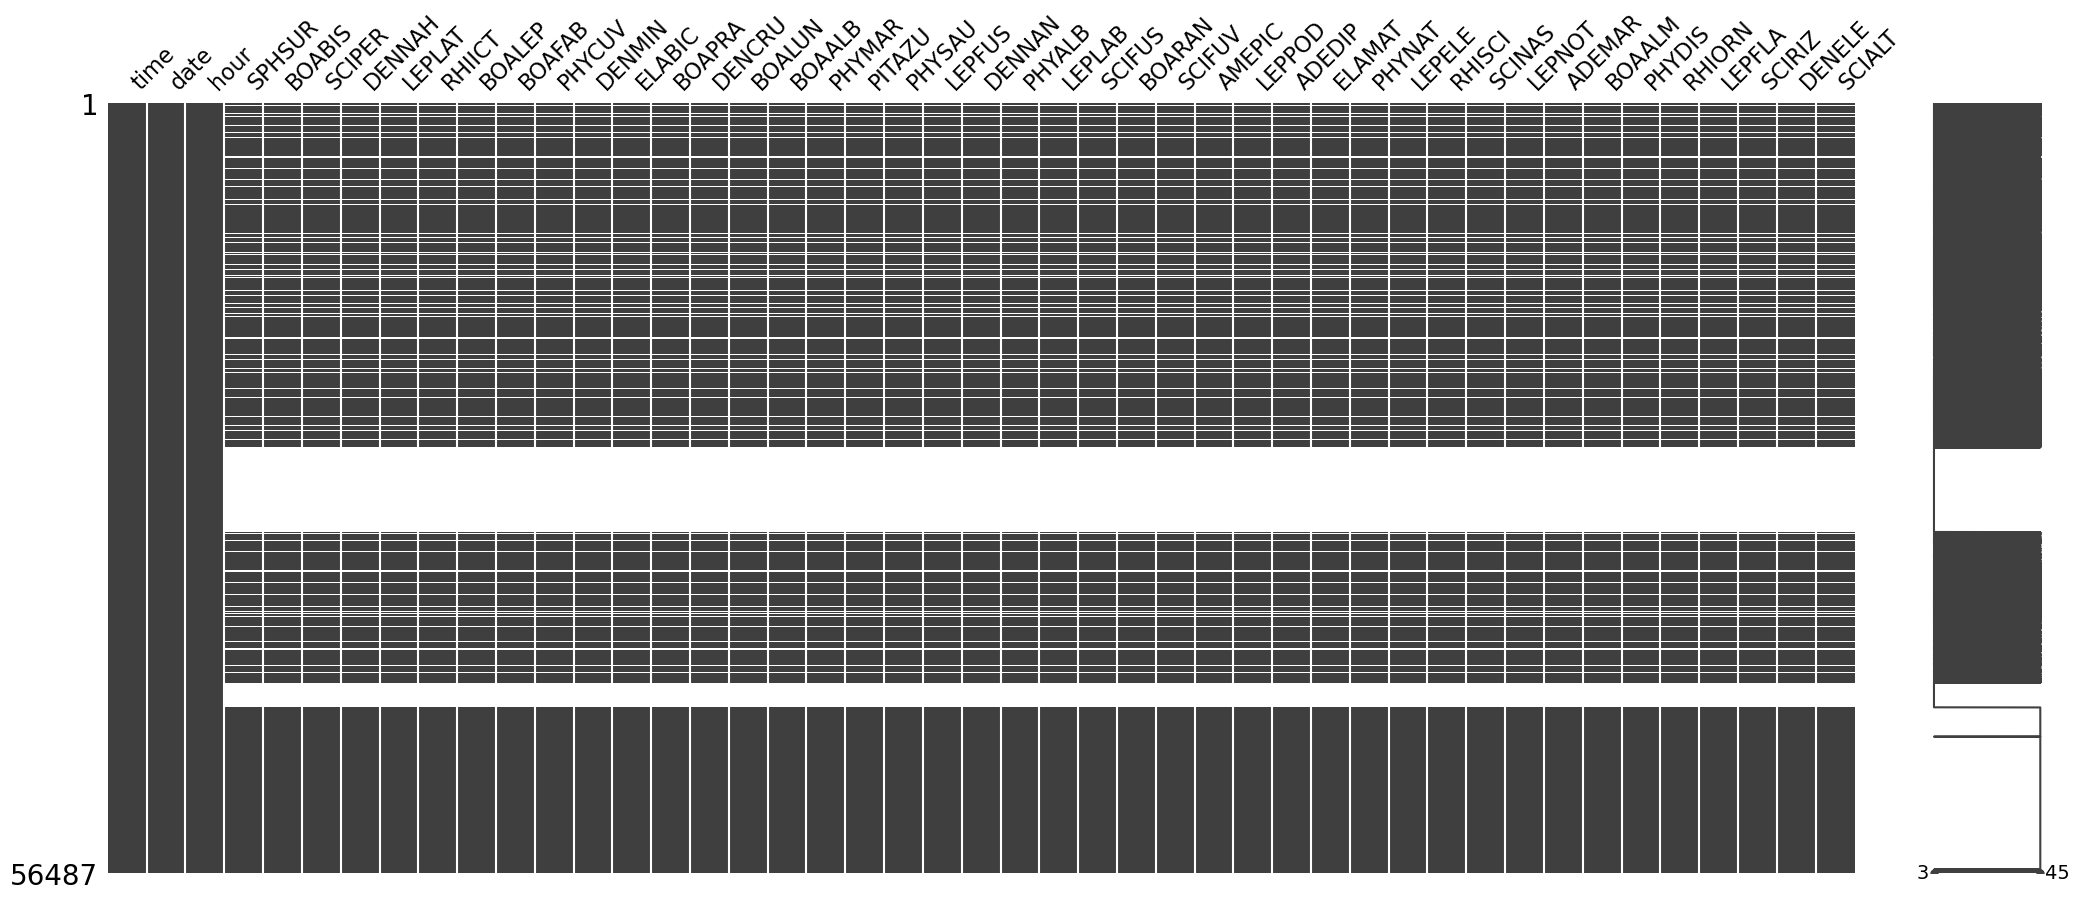

In [33]:
qdata.evaluate_nulls(df_inf1_h)
qdata.evaluate_duplicates(df_inf1_h)
msno.matrix(df_inf1_h)

In [22]:
df_dlog1_h

,time,date,hour,T(C)_DL,RH(%)_DL,DP(C)_DL
0,2019-09-13 14:15:00,2019-09-13,14:15:00,NaN,NaN,NaN
1,2019-09-13 14:30:00,2019-09-13,14:30:00,NaN,NaN,NaN
2,2019-09-13 14:45:00,2019-09-13,14:45:00,NaN,NaN,NaN
3,2019-09-13 15:00:00,2019-09-13,15:00:00,NaN,NaN,NaN
4,2019-09-13 15:15:00,2019-09-13,15:15:00,NaN,NaN,NaN
...,...,...,...,...,...,...
56482,2021-04-23 22:45:00,2021-04-23,22:45:00,NaN,NaN,NaN
56483,2021-04-23 23:00:00,2021-04-23,23:00:00,NaN,NaN,NaN
56484,2021-04-23 23:15:00,2021-04-23,23:15:00,NaN,NaN,NaN
56485,2021-04-23 23:30:00,2021-04-23,23:30:00,NaN,NaN,NaN



Number of Nulls in the dataframe:
Column: time - Nulls: 0 - Percentage: 0.00%
Column: date - Nulls: 0 - Percentage: 0.00%
Column: hour - Nulls: 0 - Percentage: 0.00%
Column: T(C)_DL - Nulls: 44485 - Percentage: 78.75%
Column: RH(%)_DL - Nulls: 44485 - Percentage: 78.75%
Column: DP(C)_DL - Nulls: 44485 - Percentage: 78.75%

Number of Duplicates in the dataframe: 0 - Percentage: 0.00%


<Axes: >

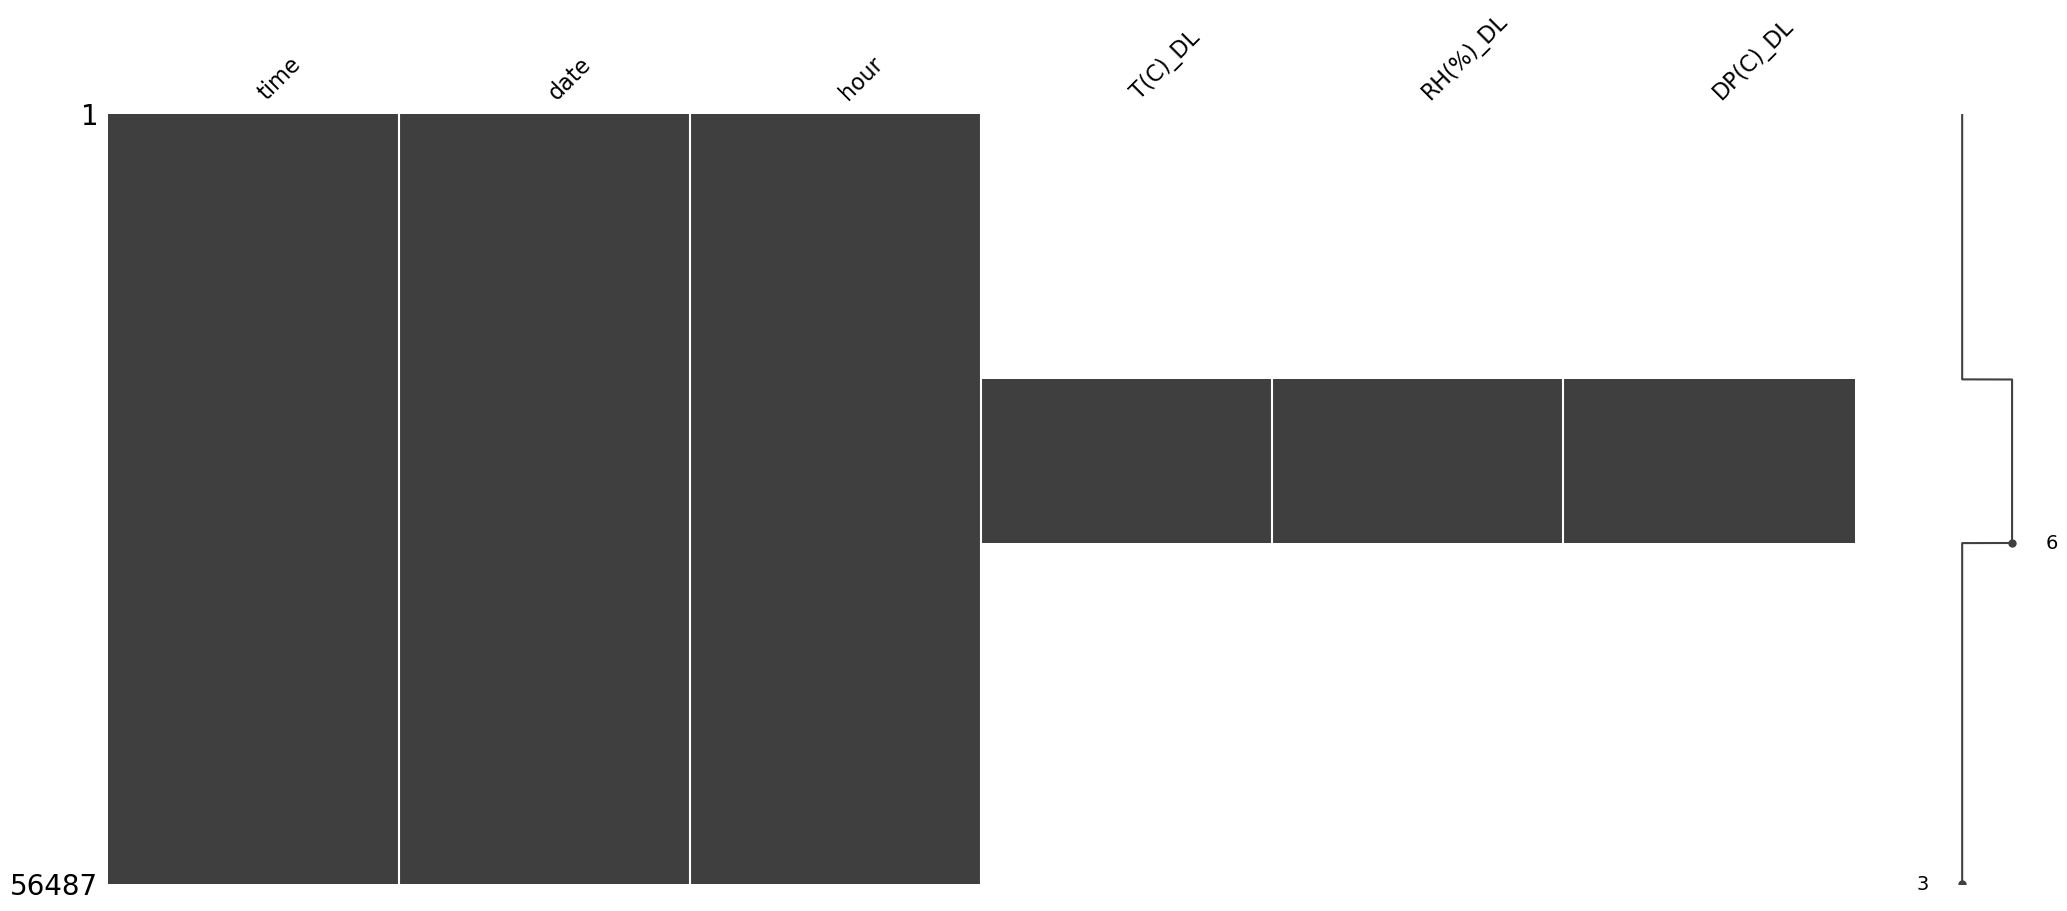

In [34]:
qdata.evaluate_nulls(df_dlog1_h)
qdata.evaluate_duplicates(df_dlog1_h)
msno.matrix(df_dlog1_h)

In [23]:
df_wst1_h

,time,date,hour,T_max(C)_WS,T_min(C)_WS,Rainfall(mm)_WS
0,2019-09-13 14:15:00,2019-09-13,14:15:00,NaN,NaN,NaN
1,2019-09-13 14:30:00,2019-09-13,14:30:00,NaN,NaN,NaN
2,2019-09-13 14:45:00,2019-09-13,14:45:00,NaN,NaN,NaN
3,2019-09-13 15:00:00,2019-09-13,15:00:00,NaN,NaN,NaN
4,2019-09-13 15:15:00,2019-09-13,15:15:00,NaN,NaN,NaN
...,...,...,...,...,...,...
56482,2021-04-23 22:45:00,2021-04-23,22:45:00,NaN,NaN,NaN
56483,2021-04-23 23:00:00,2021-04-23,23:00:00,NaN,NaN,NaN
56484,2021-04-23 23:15:00,2021-04-23,23:15:00,NaN,NaN,NaN
56485,2021-04-23 23:30:00,2021-04-23,23:30:00,NaN,NaN,NaN



Number of Nulls in the dataframe:
Column: time - Nulls: 0 - Percentage: 0.00%
Column: date - Nulls: 0 - Percentage: 0.00%
Column: hour - Nulls: 0 - Percentage: 0.00%
Column: T_max(C)_WS - Nulls: 41489 - Percentage: 73.45%
Column: T_min(C)_WS - Nulls: 41489 - Percentage: 73.45%
Column: Rainfall(mm)_WS - Nulls: 41099 - Percentage: 72.76%

Number of Duplicates in the dataframe: 0 - Percentage: 0.00%


<Axes: >

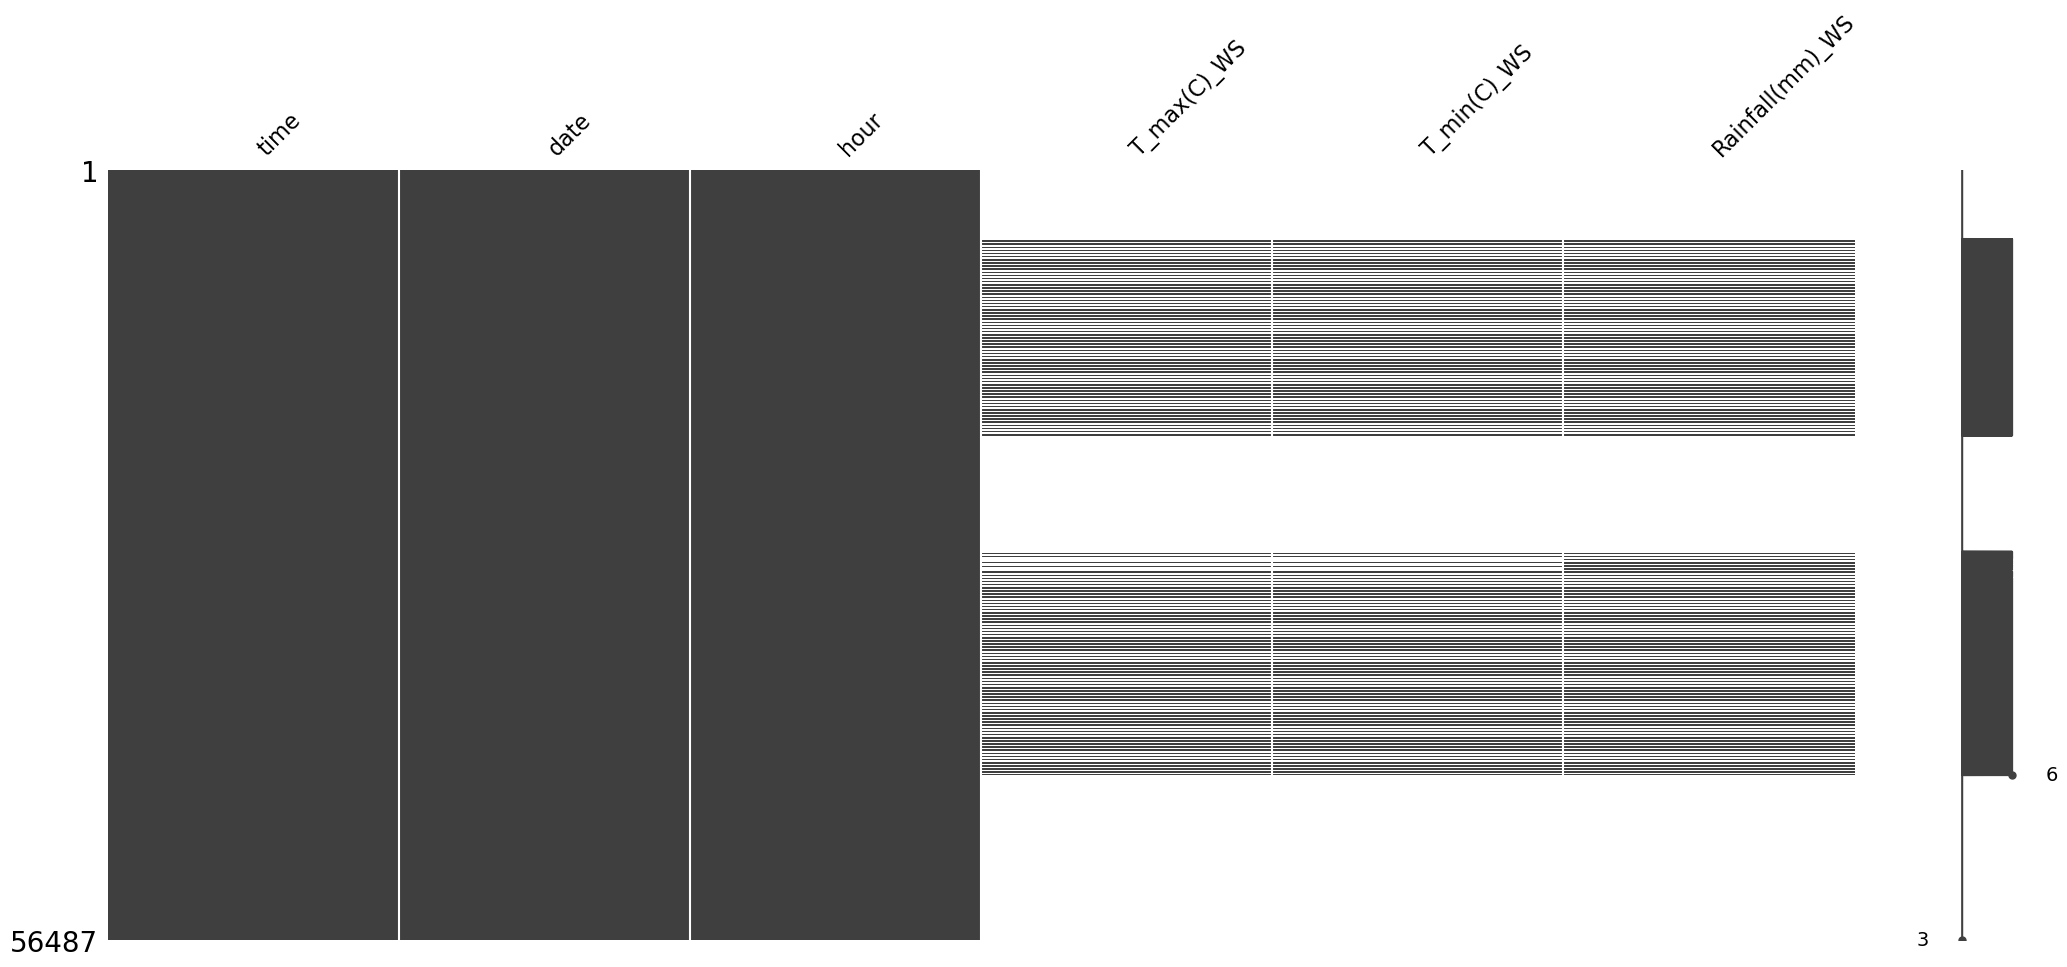

In [29]:
qdata.evaluate_nulls(df_wst1_h)
qdata.evaluate_duplicates(df_wst1_h)
msno.matrix(df_wst1_h)

In [30]:
#function to combine climate variables from datalogger and weather stations
df_climvar = hdata.combine_climvar(df_dlog1_h, df_wst1_h)

In [36]:
df_climvar

,time,date,hour,T(C),RH(%),DP(C),Rainfall(mm)
0,2019-09-13 14:15:00,2019-09-13,14:15:00,NaN,NaN,NaN,NaN
1,2019-09-13 14:30:00,2019-09-13,14:30:00,NaN,NaN,NaN,NaN
2,2019-09-13 14:45:00,2019-09-13,14:45:00,NaN,NaN,NaN,NaN
3,2019-09-13 15:00:00,2019-09-13,15:00:00,NaN,NaN,NaN,NaN
4,2019-09-13 15:15:00,2019-09-13,15:15:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
56482,2021-04-23 22:45:00,2021-04-23,22:45:00,NaN,NaN,NaN,NaN
56483,2021-04-23 23:00:00,2021-04-23,23:00:00,NaN,NaN,NaN,NaN
56484,2021-04-23 23:15:00,2021-04-23,23:15:00,NaN,NaN,NaN,NaN
56485,2021-04-23 23:30:00,2021-04-23,23:30:00,NaN,NaN,NaN,NaN



Number of Nulls in the dataframe:
Column: time - Nulls: 0 - Percentage: 0.00%
Column: date - Nulls: 0 - Percentage: 0.00%
Column: hour - Nulls: 0 - Percentage: 0.00%
Column: T(C) - Nulls: 30835 - Percentage: 54.59%
Column: RH(%) - Nulls: 44485 - Percentage: 78.75%
Column: DP(C) - Nulls: 44485 - Percentage: 78.75%
Column: Rainfall(mm) - Nulls: 41099 - Percentage: 72.76%

Number of Duplicates in the dataframe: 0 - Percentage: 0.00%


<Axes: >

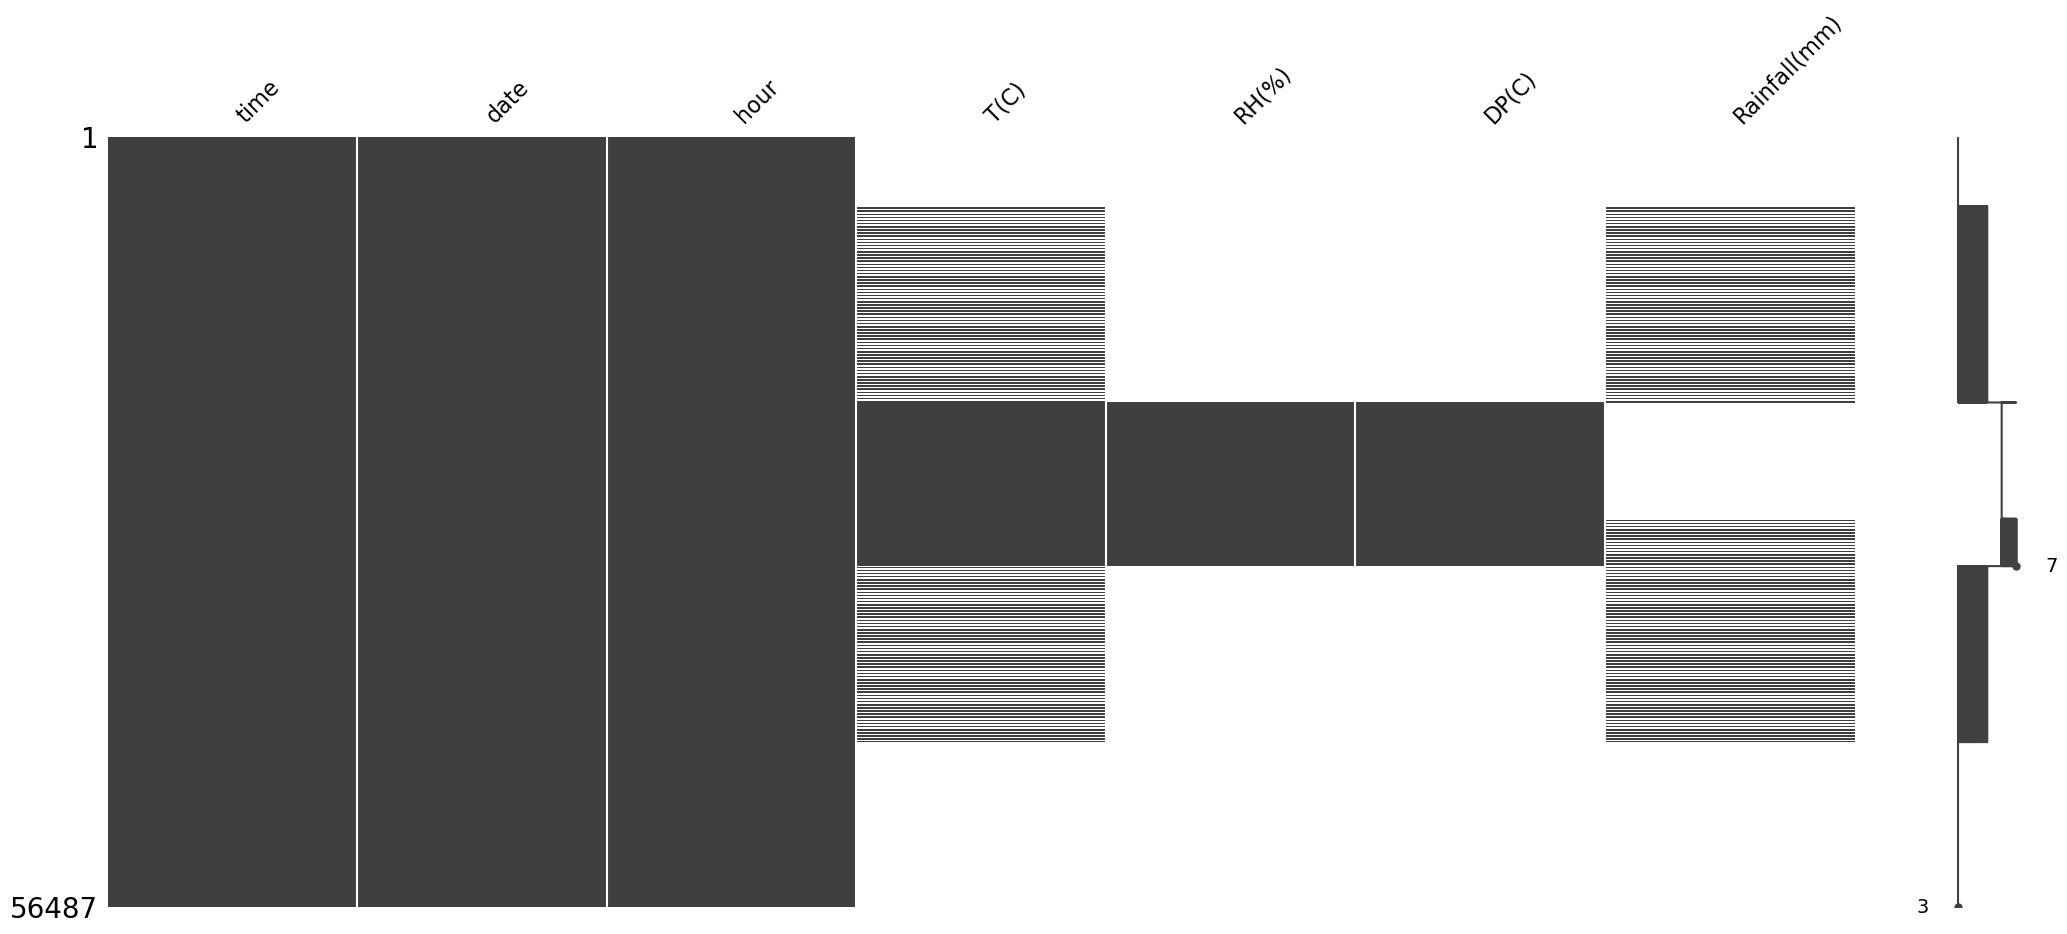

In [37]:
qdata.evaluate_nulls(df_climvar)
qdata.evaluate_duplicates(df_climvar)
msno.matrix(df_climvar)

# Fifth, create EBV-ready datset file

In [38]:
chebv.ebv_rd_create(df_inf1_h, df_climvar, folder_path, ebv_rd_name, ebv_rd_metadata, location_id)

# Sixth, read EBV-ready datset file

In [39]:
df_ebv_rd = chebv.ebv_rd_read(folder_path, ebv_rd_name)

In [40]:
df_ebv_rd

,time,date,hour,PHYCUV,DENMIN,DENNAN,PHYALB,LEPPOD,T(C),RH(%),DP(C),Rainfall(mm)
0,2019-09-13 14:15:00,2019-09-13,14:15:00,0.254178,0.251312,0.020800,0.973631,0.038394,NaN,NaN,NaN,NaN
1,2019-09-13 14:30:00,2019-09-13,14:30:00,0.017625,0.004375,0.000091,0.635850,0.093126,NaN,NaN,NaN,NaN
2,2019-09-13 14:45:00,2019-09-13,14:45:00,0.016110,0.050327,0.899623,0.719864,0.211528,NaN,NaN,NaN,NaN
3,2019-09-13 15:00:00,2019-09-13,15:00:00,0.035360,0.000363,0.000020,0.526075,0.008587,NaN,NaN,NaN,NaN
4,2019-09-13 15:15:00,2019-09-13,15:15:00,0.006599,0.007009,0.000071,0.350728,0.028263,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
56482,2021-04-23 22:45:00,2021-04-23,22:45:00,0.000236,0.119355,0.007613,0.023059,0.008221,NaN,NaN,NaN,NaN
56483,2021-04-23 23:00:00,2021-04-23,23:00:00,0.001236,0.600147,0.004165,0.013620,0.014654,NaN,NaN,NaN,NaN
56484,2021-04-23 23:15:00,2021-04-23,23:15:00,0.000991,0.260931,0.006350,0.035782,0.017921,NaN,NaN,NaN,NaN
56485,2021-04-23 23:30:00,2021-04-23,23:30:00,0.000704,0.047933,0.001082,0.005311,0.009014,NaN,NaN,NaN,NaN


# Seventh, plot

<Axes: >

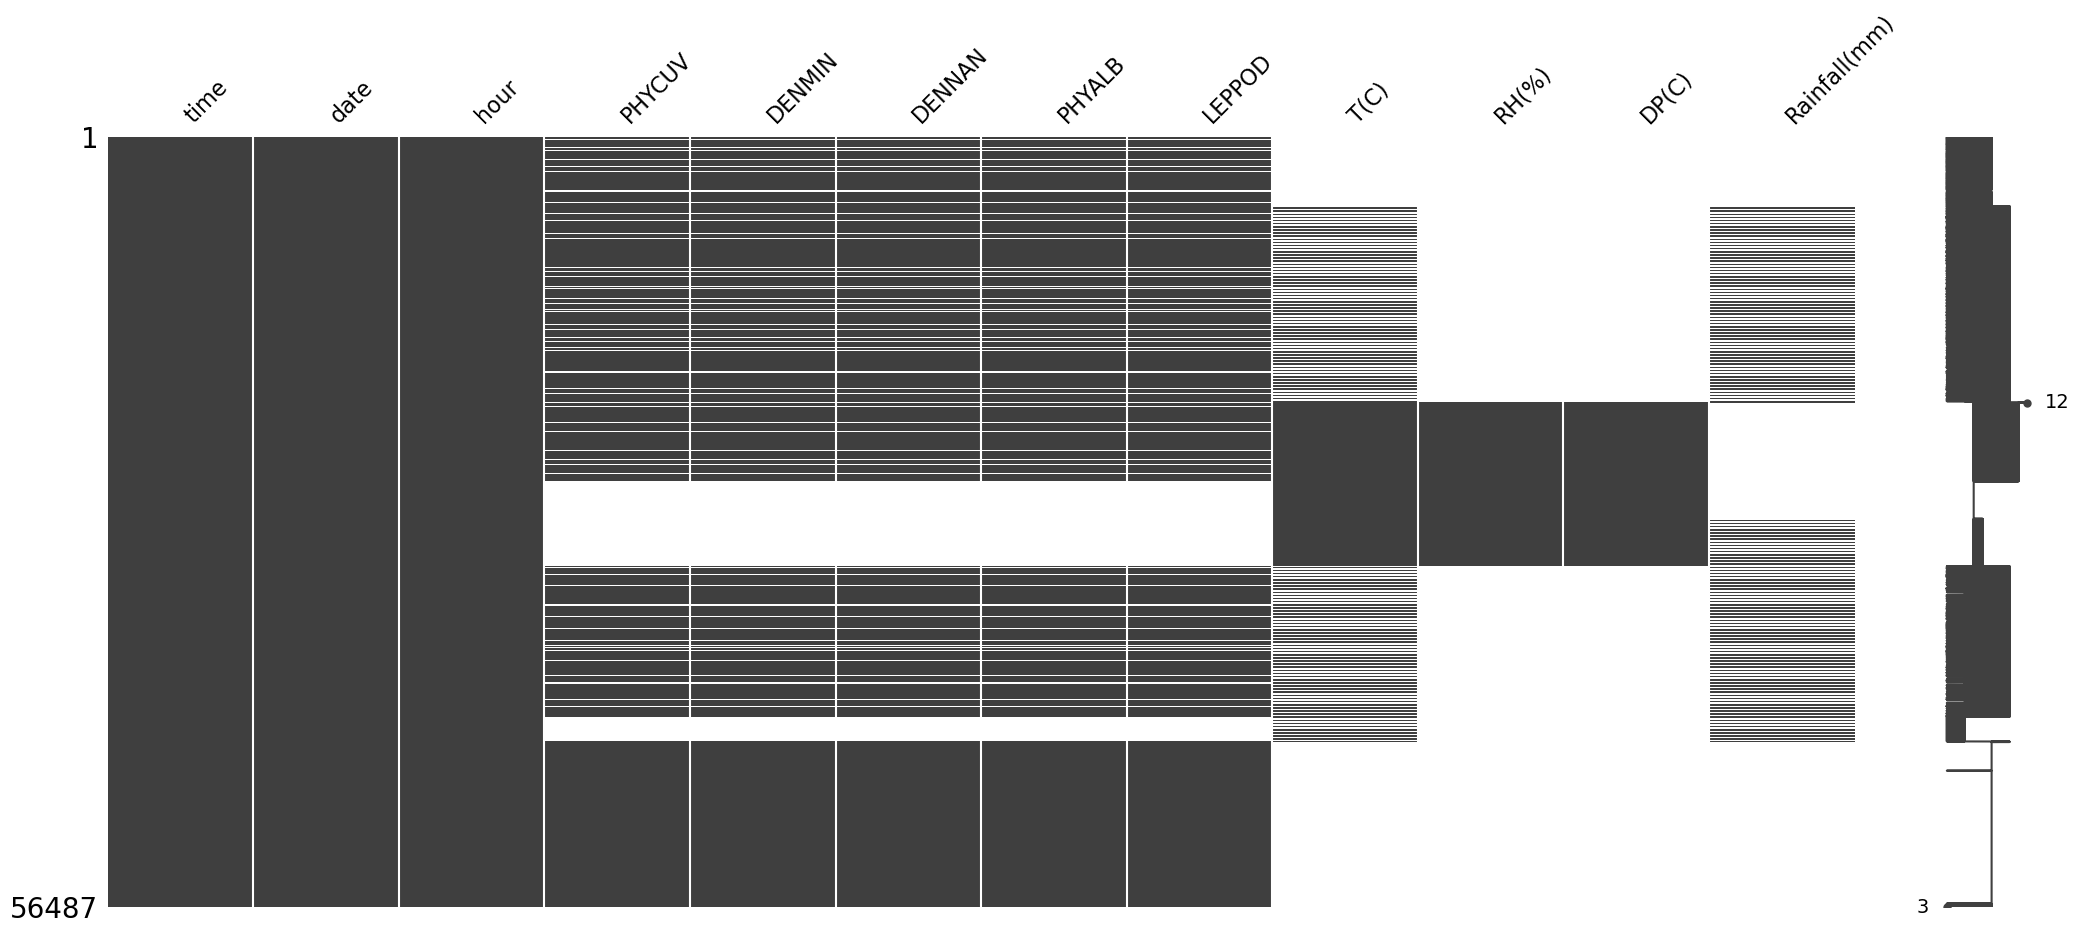

In [41]:
msno.matrix(df_ebv_rd)